In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_table('./src/output.txt', sep='\t')
df.head(n=5)

,time_stamp,px_state,py_state,v_state,yaw_angle_state,yaw_rate_state,sensor_type,NIS,px_measured,py_measured,px_ground_truth,py_ground_truth,vx_ground_truth,vy_ground_truth
0,1477010443000000,0.312243,0.580340,0.00000,0.000000e+00,0.000000e+00,lidar,0.000000,0.312243,0.580340,0.600000,0.600000,5.19994,0.000000
1,1477010443050000,0.734613,0.628749,7.22131,2.292920e-17,-6.225380e-17,radar,74.244500,0.862916,0.534212,0.859997,0.600045,5.19975,0.001797
2,1477010443100000,1.160520,0.494895,7.22447,-1.270590e-01,-1.185710e-02,lidar,0.220190,1.173850,0.481073,1.119980,0.600225,5.19943,0.005390
3,1477010443150000,1.257690,0.533205,7.20901,1.217890e-01,3.051640e-02,radar,1.826060,0.969149,0.397513,1.379960,0.600629,5.19898,0.010778
4,1477010443200000,1.616130,0.595302,7.22305,1.609680e-01,4.638490e-02,lidar,0.165894,1.650630,0.624690,1.639900,0.601347,5.19839,0.017960


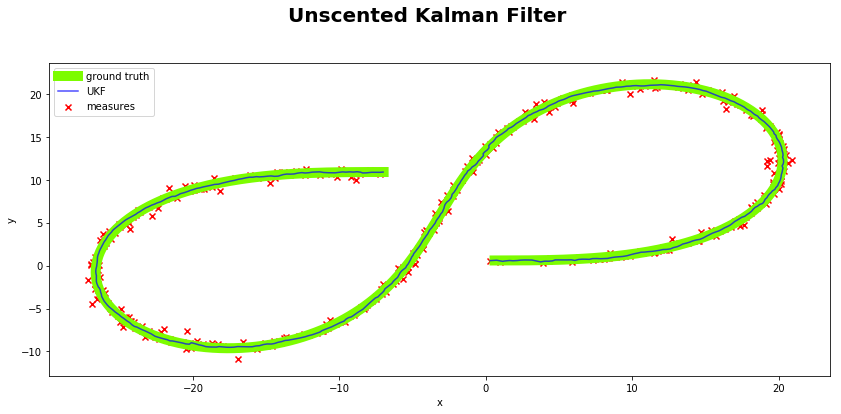

In [5]:
fig = plt.figure(figsize=(14, 6))
fig.suptitle('Unscented Kalman Filter', fontsize=20, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(df["px_ground_truth"],df["py_ground_truth"], c='lawngreen', label = "ground truth", linewidth = 10)
ax.plot(df["px_state"],df["py_state"],alpha=0.7,c='b', label = "UKF")
ax.scatter(df["px_measured"],df["py_measured"],c='r', label = "measures", marker='x')
ax.legend(loc='upper left')

plt.savefig('images/position.png')
plt.show()

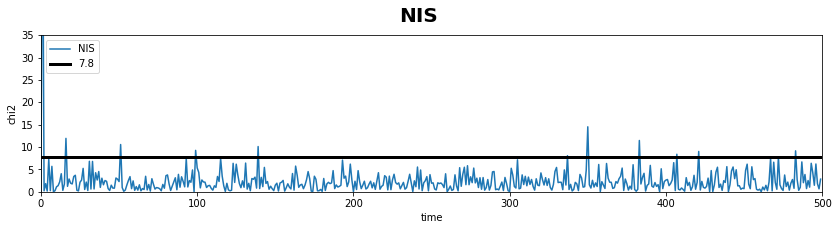

In [8]:
fig = plt.figure(figsize=(14, 3))
fig.suptitle('NIS', fontsize=20, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('time')
ax.set_ylabel('chi2')
ax.plot(df['NIS'])
ax.plot((0, 500), (7.8, 7.8), 'k-', linewidth=3, label = '7.8')
ax.legend(loc='upper left')
ax.axis([0, 500 , 0, 35])

plt.savefig('images/NIS.png')
plt.show()

In [9]:
len(df[df['NIS']>7.8])/len(df['NIS'])

0.022